<a href="https://colab.research.google.com/github/vick-git11/API/blob/main/PART_B_PANDAS_ASSIGNMENTv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
#1. Load the sales data into a DataFrame
import pandas as pd

# Define the path to your CSV file
# Replace 'your_sales_data.csv' with the actual name of your file and correct the path if needed.
csv_path = '/content/drive/MyDrive/Numpy_Assignment/saless.csv'

sales_df = pd.read_csv(csv_path, encoding='latin1')
sales_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [37]:
import os

drive_path = '/content/drive/MyDrive/Numpy_Assignment'

# Check if the directory exists
if os.path.exists(drive_path):
    print(f"Contents of {drive_path}:")
    for item in os.listdir(drive_path):
        print(item)
else:
    print(f"The directory {drive_path} does not exist. Please check the path.")

Contents of /content/drive/MyDrive/Numpy_Assignment:
saless.csv
KENTemps.csv
KENTemp.csv


In [35]:
#2. Clean data (handle missing or incorrect values)
# Check missing values
sales_df.isnull().sum()

# Impute numeric columns with mean
numeric_cols = sales_df.select_dtypes(include='number').columns
sales_df[numeric_cols] = sales_df[numeric_cols].fillna(sales_df[numeric_cols].mean())

# Drop rows with missing categorical values
sales_df.dropna(inplace=True)


In [36]:
#3. Minimum, average, and maximum quantity ordered and price per product line
product_stats = sales_df.groupby('PRODUCTLINE').agg(
    Min_Quantity=('QUANTITYORDERED', 'min'),
    Avg_Quantity=('QUANTITYORDERED', 'mean'),
    Max_Quantity=('QUANTITYORDERED', 'max'),
    Min_Price=('PRICEEACH', 'min'),
    Avg_Price=('PRICEEACH', 'mean'),
    Max_Price=('PRICEEACH', 'max')
)

print(product_stats)


                  Min_Quantity  Avg_Quantity  Max_Quantity  Min_Price  \
PRODUCTLINE                                                             
Classic Cars                21     34.391304            60      40.40   
Motorcycles                 20     34.318182            49      39.83   
Planes                      20     31.523810            47      60.54   
Ships                       24     24.000000            24      45.39   
Trucks and Buses            21     34.111111            50      38.50   
Vintage Cars                15     34.846154            66      26.88   

                  Avg_Price  Max_Price  
PRODUCTLINE                             
Classic Cars      84.634783     100.00  
Motorcycles       81.819545     100.00  
Planes            87.997619     100.00  
Ships             45.390000      45.39  
Trucks and Buses  85.372222     100.00  
Vintage Cars      83.207949     100.00  


In [27]:
#4. Total sales per product line per country per year
sales_df['ORDERDATE'] = pd.to_datetime(sales_df['ORDERDATE'])
sales_df['YEAR'] = sales_df['ORDERDATE'].dt.year

sales_summary = sales_df.groupby(
    ['PRODUCTLINE', 'COUNTRY', 'YEAR']
)['SALES'].sum().reset_index()

print(sales_summary)

         PRODUCTLINE    COUNTRY  YEAR     SALES
0       Classic Cars  Australia  2003  66508.38
1       Classic Cars  Australia  2004  63952.56
2       Classic Cars  Australia  2005  31409.52
3        Motorcycles  Australia  2003  42352.70
4        Motorcycles  Australia  2004  33123.97
5             Planes  Australia  2003  22347.02
6             Planes  Australia  2004  41425.07
7              Ships  Australia  2004   1089.36
8   Trucks and Buses  Australia  2004  36104.09
9   Trucks and Buses  Australia  2005  29916.87
10      Vintage Cars  Australia  2003  46308.71
11      Vintage Cars  Australia  2004  44366.81
12      Vintage Cars  Australia  2005  47657.46


In [28]:
#5. Group sales volume by deal size
deal_size_summary = sales_df.groupby('DEALSIZE')['SALES'].sum()
print(deal_size_summary)

DEALSIZE
Large      43810.20
Medium    314428.92
Small     148323.40
Name: SALES, dtype: float64


In [29]:
#6. Identify top 10 customers by sales
top_customers = sales_df.groupby('CUSTOMERNAME')['SALES'].sum() \
    .sort_values(ascending=False) \
    .head(10)

print(top_customers)

CUSTOMERNAME
Australian Collectors, Co.    200995.41
Anna's Decorations, Ltd       153996.13
Souveniers And Things Co.     151570.98
Name: SALES, dtype: float64


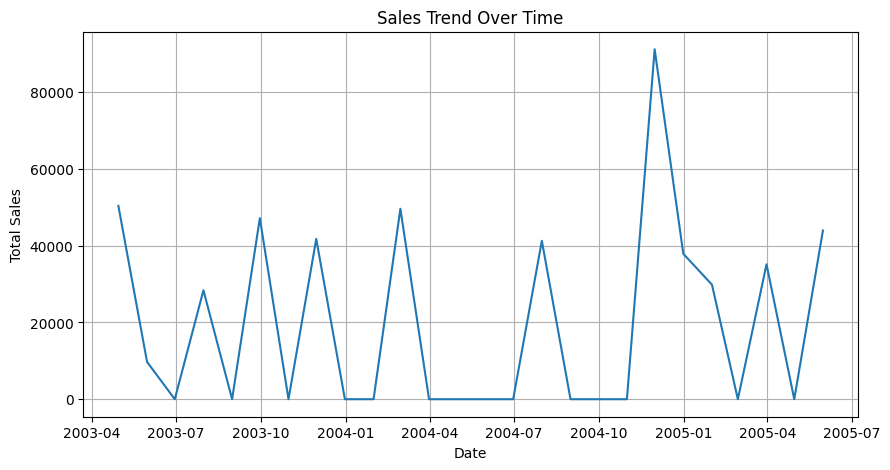

In [30]:
#7. Visualize sales trends over time
import matplotlib.pyplot as plt

monthly_sales = sales_df.resample('ME', on='ORDERDATE')['SALES'].sum()

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

In [31]:
#8. NumPy-based advanced analysis (outliers and regional comparison)
#a) Identify outliers using Z-score
from scipy.stats import zscore
import numpy as np

sales_df['Sales_Z'] = zscore(sales_df['SALES'])
outliers = sales_df[np.abs(sales_df['Sales_Z']) > 3]

print("Outliers detected:")
print(outliers)

Outliers detected:
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
81        10120               46      100.0                2  9264.86   
90        10223               49      100.0                3  9774.03   

    ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...       CITY     STATE  \
81 2003-04-29  Shipped       2         4     2003  ...  Melbourne  Victoria   
90 2004-02-20  Shipped       1         2     2004  ...  Melbourne  Victoria   

   POSTALCODE    COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  \
81       3004  Australia      APAC        Ferguson            Peter    Large   
90       3004  Australia      APAC        Ferguson            Peter    Large   

    YEAR   Sales_Z  
81  2003  3.398596  
90  2004  3.695985  

[2 rows x 27 columns]


In [32]:
#b) Statistical comparison of sales between regions
region_sales = sales_df.groupby('COUNTRY')['SALES'].mean()
print(region_sales)

COUNTRY
Australia    3446.003537
Name: SALES, dtype: float64
